
# Table of contents
* About the Notebook
* Hypothesis
* Importing Libraries
* Overview of dataset
    * Exploring the Data
    * Data sampling
    * Visualizing
    * Outlier treatment
    * Correlation
* Conclusion

# About this notebook
In the following notebook, I reviewed the demographic dataset and investigated different aspects of this simple dataset. 
In the first part, I imported the libraries which I needed for my experiments.
To import the dataset, I considered the Panda's library and read the *CSV file by calling the Pandas's method. And to have an overview of our data frame, I called the five top rows of the dataset by the Head method. For the description, I studied the five features of the dataset (In terms of min, max, std, mean, and quartile). Also, one can find the size, type, and dimensions of the dataset in the related cell. 

To have a clean dataset, I had to check the null or missing values, and if I find any, there are different approaches to deal with them. Hence, I checked the missing values and used another function to remove the null value in the case that we have any.

So it is time to dive into the details by exploring more. For this matter, I visualized the data by plotting the histogram of each feature, scatter plot to see the relationship between pair columns, and box plot to have a summary of quantile, max, min, median, and mean of each attribute.

Regarding the outlier, I reviewed the box plot and scatter plot, and defined the lower and upper bound to drop the outliers.

Finally, I checked the correlation by applying the Pearson method and print out the covariance.

# Hypothesis

* There would be a relationship between different features of the dataset.
* There is a high correlation between one pair of columns.
* There are duplicated values.
* Do customers in different regions spend more per transaction? Which regions spend the most/least?
* Is there a relationship between number of items purchased and amount spent?

# Importing Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

For the sake of sampling and other experiments, I added a random seed to generate a different seed for functions.

In [2]:
Random_seed = random.randint(1, 1000)
print(Random_seed)

709


# Obtaining Data

In [3]:
data = pd.read_csv('https://github.com/samanemami/MyScratch/blob/main/Demographic_Data/Demographic_Data.csv')

## An overview of dataset

In [4]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


### Check Data description 

In [5]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Check the data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


## Data cleaning

### Check missing values

In [7]:
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Drop missing value
> We do not have any

In [8]:
data = data.drop_duplicates()
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Check our data type

In [9]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

## Explore the Data

In [10]:
print(data.columns)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


### The number of purchases

I tried to group by the dataset to check different features in contrast to the rest.

In [11]:
data.groupby('in-store')['in-store'].count()

in-store
0    39989
1    39990
Name: in-store, dtype: int64

Here we can find the average of in-store shopping regarding the sale zone

In [12]:
pd.DataFrame(data.groupby(data['region'])['in-store'].mean())

,in-store
region,
1,1.000000
2,0.000000
3,0.611056
4,0.500000


Many libraries in python during the implementation, print out the logs. To have a clear output, I ignore the printing of the outputs.

Text(0.5, 1.0, 'Number of in store purchases')

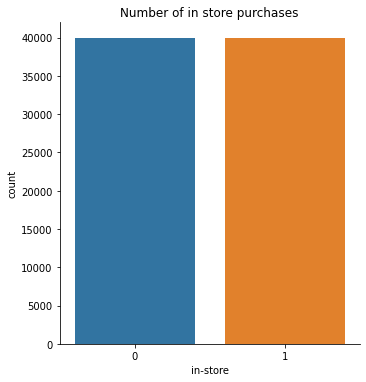

In [13]:
import warnings
warnings.simplefilter("ignore")
sns.factorplot('in-store', data=data, kind='count', aspect=1)
plt.title("Number of in store purchases")

Same as previous without duplicated purchased amount

Text(0.5, 1.0, 'Number of in store purchases')

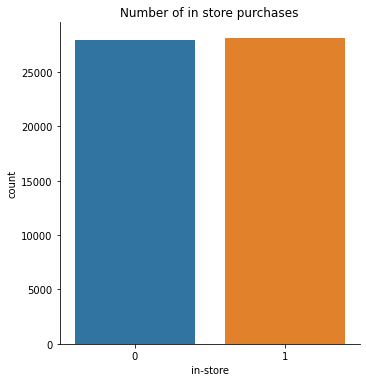

In [14]:
subset = data.drop_duplicates(subset='amount')
sns.factorplot('in-store', data = subset, kind='count', aspect=1)
plt.title("Number of in store purchases")

### Exploring the amount of purchase in the different zones

In [41]:
subset[['amount','items']].describe()

,amount,items
count,56112.000000,56112.000000
mean,773.777077,4.500570
std,711.524795,2.062297
min,5.004700,1.000000
25%,259.280000,3.000000
50%,532.005000,4.000000
75%,971.357500,6.000000
max,3000.000000,8.000000


In [43]:
pd.crosstab(index=subset['items'], columns=subset['region'],
            margins=True).style.background_gradient(cmap='YlGn')

region,1,2,3,4,All
items,,,,,
1,775,1069,920,1238,4002
2,1600,2068,1877,2398,7943
3,1675,2138,1897,2384,8094
4,1694,2154,1984,2344,8176
5,1568,2086,1825,2366,7845
6,1665,2178,1823,2332,7998
7,1553,2161,1867,2402,7983
8,828,1074,941,1228,4071
All,11358,14928,13134,16692,56112


With this table, we have the aggregated values of items for each region.
I used CrossTab here because with this, categorical variables can easily be visualized.

## Dropping duplicates values by subsetting the amount
From the previous cell, I understand that the plots do not make a sense so, I thought about duplicated values in a specific column.

First of all, I sorted my data frame to have the ideal form of table which I was looking for.

I stored the modified dataset in a *Sorted* DataFrame

In [16]:
Sorted = data.sort_values('items', inplace=False)
Sorted.drop_duplicates(subset='amount', inplace=True)
Sorted.tail()

,in-store,age,items,amount,region
61190,0,36,8,35.448,2
49719,0,57,8,1490.000,4
21945,0,30,8,963.560,3
49728,1,19,8,948.790,4
74174,1,54,8,1855.200,4


       in-store    age  amount  region
items                                 
1          5699   5699    5699    5699
2         11284  11284   11284   11284
3         11486  11486   11486   11486
4         11594  11594   11594   11594
5         11233  11233   11233   11233
6         11519  11519   11519   11519
7         11376  11376   11376   11376
8          5788   5788    5788    5788
       in-store    age  amount
items                         
1          5699   5699    5699
2         11284  11284   11284
3         11486  11486   11486
4         11594  11594   11594
5         11233  11233   11233
6         11519  11519   11519
7         11376  11376   11376
8          5788   5788    5788


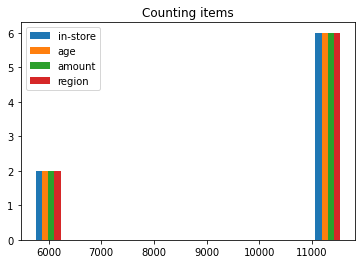

In [17]:
Sorted = data.groupby(data['items']).count()
it = Sorted.iloc[:, 0:3]
plt.hist(Sorted)
plt.legend(Sorted.columns)
plt.title('Counting items')
print(Sorted)
print(it)

Text(0, 0.5, 'age')

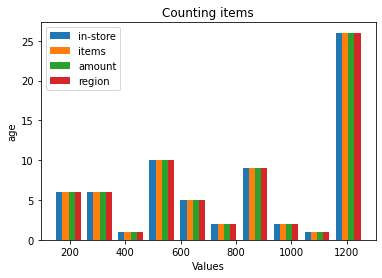

In [18]:
Sorted = data.sort_values('items', inplace=False)
Sorted.drop_duplicates(subset='amount', inplace=True)

age = Sorted.groupby(Sorted['age']).count()
plt.hist(age)
plt.legend(age.columns)
plt.title('Counting items')
plt.xlabel('Values')
plt.ylabel('age')

### Check the columns' names

### Plotting
>  a histogram on the features

The goal here is to check the distributions

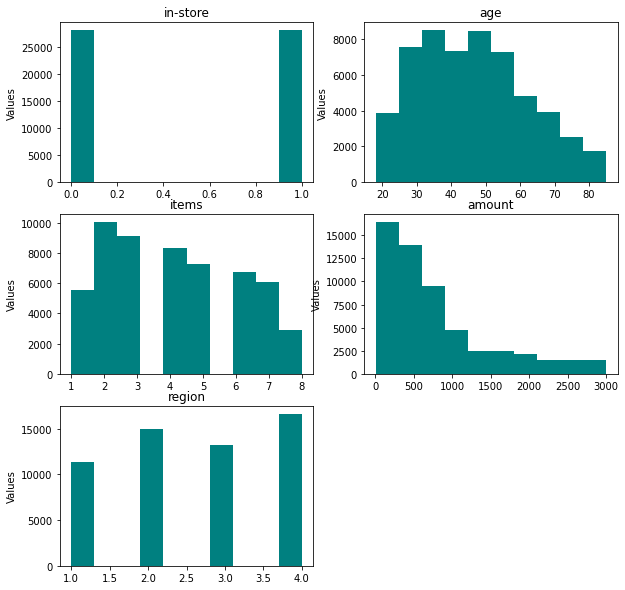

In [19]:
plt.figure(figsize=(10, 10))
for i, j in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(Sorted[j], color='teal', histtype='bar')
    plt.title(str(data.columns[i]))
    plt.ylabel("Values") 

**I focused on the amount in the different regions and compared their distributions together**

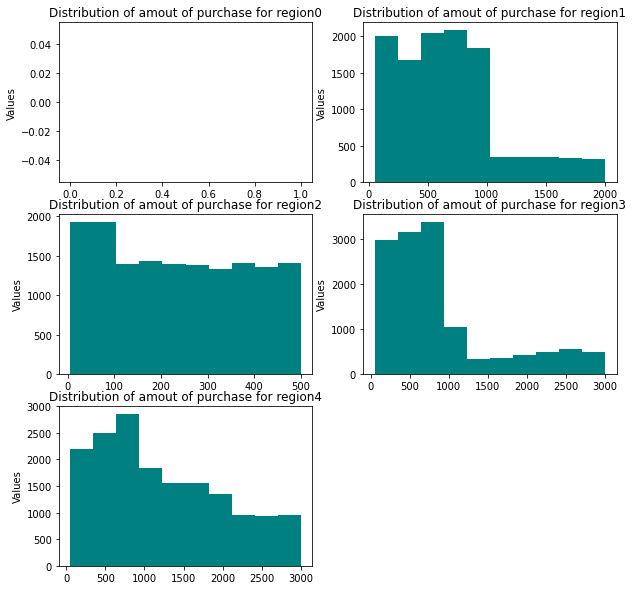

In [20]:
plt.figure(figsize=(10, 10))
for i, j in enumerate(data.columns):
    n = 'region' + str(i)
    n = Sorted[Sorted['region'] == i]
    plt.subplot(3, 2, i+1)
    plt.hist(n['amount'], color='teal', histtype='bar')
    plt.title('Distribution of amout of purchase for region' + str(i))
    plt.ylabel("Values") 

In [52]:
sample = Sorted.sample(frac=0.005, random_state=Random_seed)
print(sample.shape)
sample.tail()
sns.violinplot('amount','items',hue='region', 'age',data=sample,split=True,ax=ax[0])
plt.title('PClass and Age vs Survived')
# ax[0].set_yticks(range(0,110,10))

plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-52-8fe2a097554d>, line 4)

### Data sampling

I generated a random sample from the main dataset to explore the dataset in a small dimension.

In [21]:
sample = Sorted.sample(frac=0.005, random_state=Random_seed)
print(sample.shape)
sample.tail()

(281, 5)


,in-store,age,items,amount,region
1895,1,23,4,952.45,1
25028,1,55,7,536.14,1
1362,1,71,5,887.38,1
51722,1,49,2,244.20,1
3768,1,28,4,959.30,3


In [22]:
X = sample['age']
y = sample['amount']
print("Age sample:", X, '\n',
      "Amount sample:", y)

Age sample: 53905    30
37370    31
28373    33
73837    28
59887    41
         ..
1895     23
25028    55
1362     71
51722    49
3768     28
Name: age, Length: 281, dtype: int64 
 Amount sample: 53905    299.95
37370    992.26
28373    462.95
73837    222.82
59887    882.75
          ...  
1895     952.45
25028    536.14
1362     887.38
51722    244.20
3768     959.30
Name: amount, Length: 281, dtype: float64


### Comparing 
> Let's compare the simple samples of two different features of our dataset

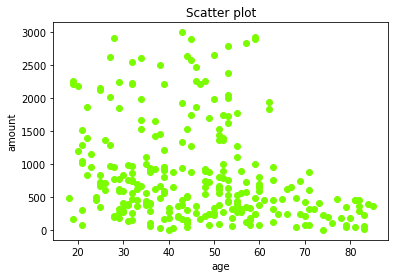

In [23]:
plt.scatter(X, y, marker='o', c='lawngreen')
plt.title("Scatter plot")
plt.xlabel("age")
plt.ylabel("amount")
plt.show()

# Scatter

We have the same scatter as the previous with this difference that I defined a python method here to return the scatter plot for the user.

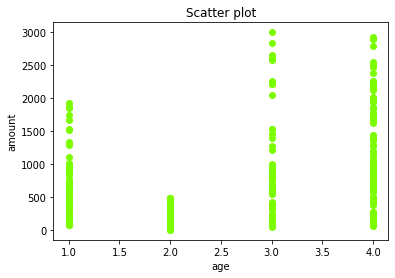

In [24]:
X = sample['region']
y = sample['amount']

def sct(X, y, Xlabel=None, ylabel=None):
    plt.scatter(X, y, marker='o', c='lawngreen')
    plt.title("Scatter plot")
    plt.xlabel(Xlabel)
    plt.ylabel(ylabel)
    return plt.show()
sct(X, y, 'age', 'amount')

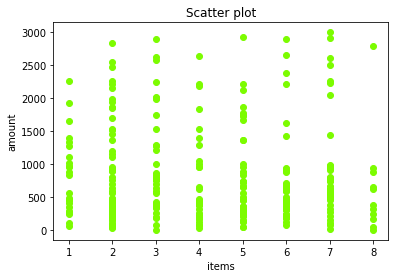

In [44]:
X = sample['items']
y = sample['amount']
sct(X, y, 'items', 'amount')

### feature dentification 

Instead of printing plots one-by-one, we can print them out in one loop in the range of features of the dataset.

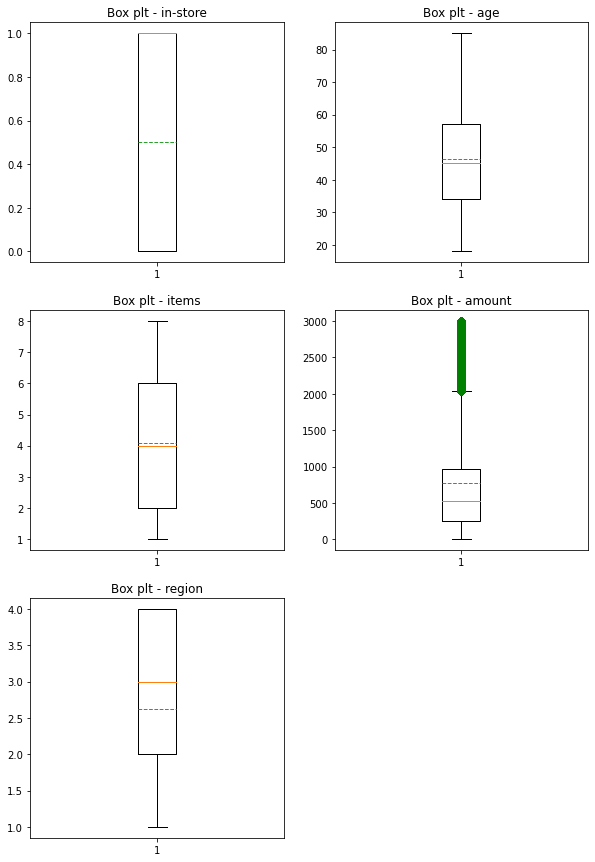

In [26]:
plt.figure(figsize=(10, 15))
for i, j in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.boxplot(Sorted[j], 0, 'gD', showmeans=True,
                meanline=True, autorange=True)
    plt.title('Box plt - ' + str(data.columns[i]))

# Outlier treatment

As we can see in the amount, we have outliers values.

After seeing the box plot, I curious about the "amount" feature, so I decided to have a subsample of it and compare it with its median. 

In [27]:
outliers = np.where(Sorted['amount']>2000)
print('outliers indes:', outliers)
(Sorted['amount']>2000).shape

outliers indes: (array([    9,    16,    25, ..., 56088, 56094, 56102], dtype=int64),)


(56112,)

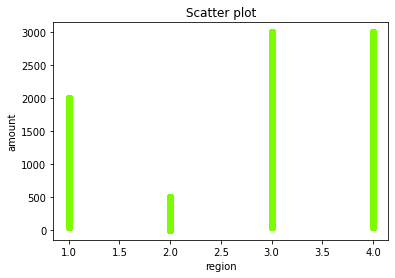

In [28]:
sct(Sorted['region'], Sorted['amount'], 'region', 'amount')

Text(0.5, 1.0, 'Checking amount outliers')

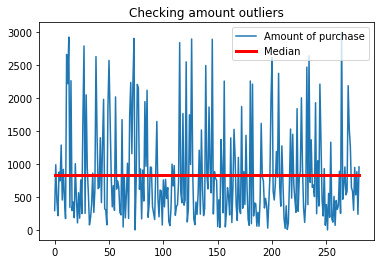

In [46]:
amount = (sample.amount).values
m = []
for i in range(amount.shape[0]):
    m.append(np.mean(amount))
plt.plot(amount, label='Amount of purchase')
plt.plot(m, linewidth=3, color='r', label='Median')
plt.legend()
plt.title("Checking amount outliers")

I considered sample data to visualize them better.

Text(0.5, 1.0, 'Distance of the amount value from the mean')

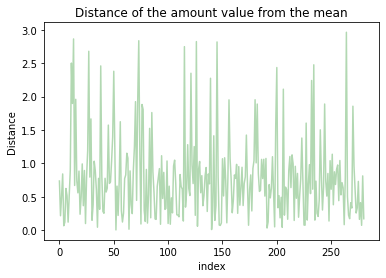

In [30]:
z = np.abs(stats.zscore(amount))
plt.plot(z, c='g', alpha=0.3)
plt.ylabel('Distance')
plt.xlabel('index')
plt.title('Distance of the amount value from the mean')

#### Defining the bounds to remove the outliers

In [31]:

Q1 = np.percentile(amount, 25, interpolation='midpoint')
Q3 = np.percentile(amount, 65, interpolation='midpoint')
IQR = Q3 - Q1
amount.shape
upper = np.where(amount>=(Q3+1.5*IQR))
lower = np.where(amount<=(Q1-1.5*IQR))
new = pd.DataFrame(amount)
new.drop(upper[0], inplace=True)
new.drop(lower[0], inplace=True)
print(new.shape)
new.head()

(238, 1)


,0
0,299.95
1,992.26
2,462.95
3,222.82
4,882.75


Text(0.5, 1.0, 'Comparing the amount with and without outliers')

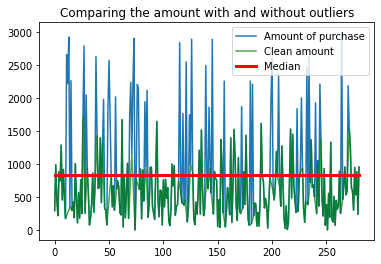

In [32]:
plt.plot(amount, label='Amount of purchase')
plt.plot(new, label='Clean amount', c='g', alpha=0.7)
plt.plot(m, linewidth=3, color='r', label='Median')
plt.legend()
plt.title("Comparing the amount with and without outliers")

Text(0.5, 1.0, 'Real values of amount')

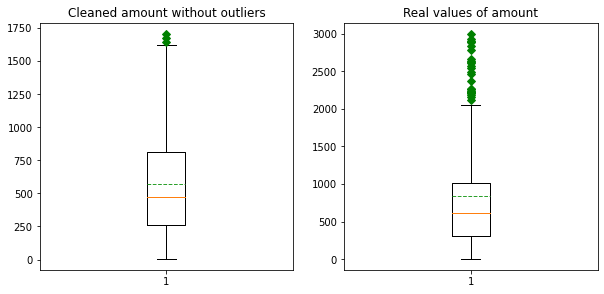

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.boxplot(new, 0, 'gD', showmeans=True,
                meanline=True, autorange=True)
plt.title('Cleaned amount without outliers')
plt.subplot(2,2,2)
plt.boxplot(amount, 0, 'gD', showmeans=True,
                meanline=True, autorange=True)
plt.title('Real values of amount')

### Check the Correlation

I chose the pearson method to return the Correlation Coefficient matrix

In [34]:
Sorted.corr("pearson")

,in-store,age,items,amount,region
in-store,1.000000,-0.173391,0.000484,-0.098819,-0.128630
age,-0.173391,1.000000,0.020355,-0.264400,-0.236675
items,0.000484,0.020355,1.000000,-0.049926,-0.026931
amount,-0.098819,-0.264400,-0.049926,1.000000,0.401362
region,-0.128630,-0.236675,-0.026931,0.401362,1.000000


#### Visualize the correlation

As we only have four attributes, it is easier to check the correlation over a heatmap

<AxesSubplot:>

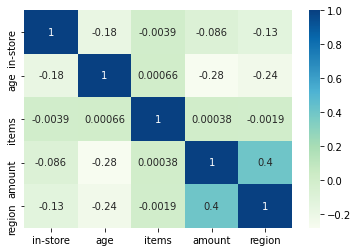

In [35]:
sns.heatmap(data.corr("pearson"), annot=True, cmap='GnBu')

 ## Joint variability

### Measure of the joint variability by using the Covariance

In [36]:
Sorted.cov()

,in-store,age,items,amount,region
in-store,0.250004,-1.369582,0.000494,-35.156382,-0.071371
age,-1.369582,249.559687,0.657035,-2971.926174,-4.148984
items,0.000494,0.657035,4.174876,-72.583476,-0.061063
amount,-35.156382,-2971.926174,-72.583476,506267.533327,316.904792
region,-0.071371,-4.148984,-0.061063,316.904792,1.231419


<AxesSubplot:>

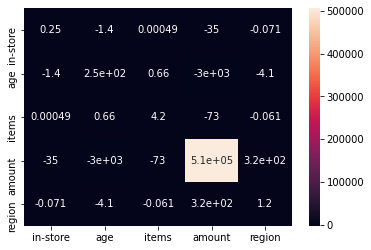

In [36]:
sns.heatmap(Sorted.cov(), annot=True)

# Conclusion

I imported the libraries which were useful to my proposal of EDA the dataset. After entering the dataset, and have an overview of the data frame, I looked for missing values and I did not find any.

To have a summary of our features, I grouped the dataset into different parts and studied them separately. My studies included sorting, histogram, scatter plots, box plots, data frame, correlations, covariance size of the data, and shape of the arrays.

From the previous studies, I found that we have duplicate values in one of our features which were "amount" so I removed them and continue with the new dataset.

Also, from different plots such as the box plot, I noted the outliers values, So I defined the various percentile of the relevant axis to drop them. After removing outliers, I compared the shape, size, and behavior of the removed outliers and the principal dataset.

Regarding the questions and hypothesizes, I should say that;
-	I found a relationship and correlation between different features of the dataset.
-	There were duplicate values in the dataset.
- Customers in regions one and four, spent more money to buy their items. And region two has the lowers amount of purchase.
-	Yes, there is a relationship between number of items purchased and amount spent.